## Time Series Analysis and Forecasting
### Assignment 01

Icecream sales is highly dependent on season. Given below is the sales (in $amount) of monthly sales of icecream for a brand.<br>
a) Split the data as train and test(90-10)<br>
b) Fit an apropriate smoothing method to the train data<br>
c) Forecast the sales for the test data<br>
d) Calulate the MAPE in the test period.<br>

In [48]:
import pandas as pd
import seaborn as sns

In [49]:
# Read the icecream sales dataset
icecream_df = pd.read_csv("icecream_sales.csv", parse_dates=True)
icecream_df.head(15)

,DATE,sales
0,01-01-1972,59.9622
1,01-02-1972,67.0605
2,01-03-1972,74.2350
3,01-04-1972,78.1120
4,01-05-1972,84.7636
5,01-06-1972,100.5960
6,01-07-1972,100.1263
7,01-08-1972,96.3607
8,01-09-1972,85.8007
9,01-10-1972,70.3934


#### The data is at a monthly frequency and date format is DD-MM-YY. We will convert it into a time indexed dataset.

In [50]:
icecream_df.index = pd.to_datetime(icecream_df.DATE, format="%d-%m-%Y")
icecream_df.index.freq = 'MS'
icecream_df.head()

,DATE,sales
DATE,,
1972-01-01,01-01-1972,59.9622
1972-02-01,01-02-1972,67.0605
1972-03-01,01-03-1972,74.2350
1972-04-01,01-04-1972,78.1120
1972-05-01,01-05-1972,84.7636


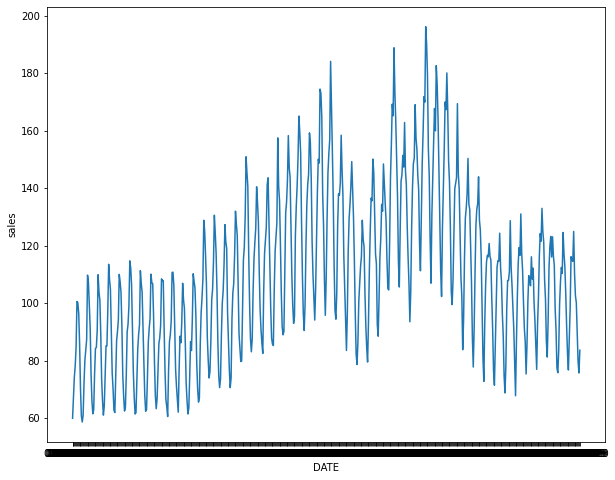

In [51]:
sns.lineplot(x='DATE', y='sales', data=icecream_df);

### Solution

In [52]:
# Required libraries
import matplotlib as mpl
mpl.rc("figure", figsize=(10,8))
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose, STL        #Time Series Decomposition

from statsmodels.tsa.holtwinters import SimpleExpSmoothing          # Simple Exponential Smoothins
from statsmodels.tsa.holtwinters import Holt                        # Holt's Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing        # Holt Winter's Exponential Smoothing

#### a)Split into train and test set (90:10)

In [53]:
train_len = int(0.9*len(icecream_df))         #519
train_ts = icecream_df.iloc[:train_len]      
test_ts = icecream_df.iloc[train_len:] 
len(test_ts)                                  #58

58

#### b)Fit the 3 smoothing methods to the train data

In [63]:
SE_fit = SimpleExpSmoothing(train_ts.sales).fit() 

Holt_fit = Holt(train_ts.sales).fit() 

HW_fit = ExponentialSmoothing(train_ts.sales, 
                                trend='add', 
                                seasonal='add',
                                seasonal_periods=12).fit()

C:\Users\sachi\AppData\Local\Temp\ipykernel_16480\910042629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ts['SES']  = SE_fit.fittedvalues
C:\Users\sachi\AppData\Local\Temp\ipykernel_16480\910042629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ts['Holt'] = Holt_fit.fittedvalues
C:\Users\sachi\AppData\Local\Temp\ipykernel_16480\910042629.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

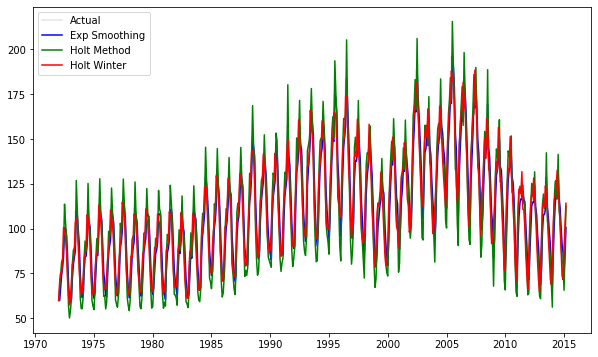

In [64]:
# Check the fitted values

#Fitted Values
train_ts['SES']  = SE_fit.fittedvalues
train_ts['Holt'] = Holt_fit.fittedvalues
train_ts['HW']   = HW_fit.fittedvalues 

#Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(train_ts.sales, color='.8', alpha=.5, label='Actual')
ax.plot(train_ts.SES, color='b', label='Exp Smoothing')
ax.plot(train_ts.Holt, color='g', label='Holt Method')
ax.plot(train_ts.HW, color='r', label='Holt Winter')
ax.legend()

#### c) Forecast the sales for the test data

In [65]:
SE_forecast = SE_fit.forecast(len(test_ts)).rename('SE Forecast')
Holt_forecast = Holt_fit.forecast(len(test_ts)).rename('Holt Forecast')
HW_forecast = HW_fit.forecast(len(test_ts)).rename('HW Forecast')

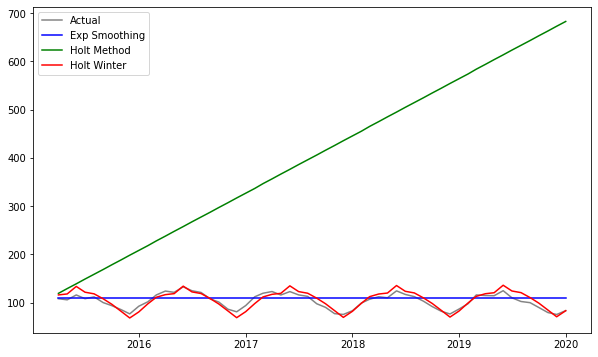

In [67]:
#Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(test_ts.sales, color='.4', alpha=.8, label='Actual')
ax.plot(SE_forecast, color='b', label='Exp Smoothing')
ax.plot(Holt_forecast, color='g', label='Holt Method')
ax.plot(HW_forecast, color='r', label='Holt Winter')
ax.legend()

#### Holt winter has the best fit. Let us calculate the MAPE as well.

In [70]:
# Calculate MAPE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

print(f'SE Forecast RMSE = {mean_absolute_percentage_error(test_ts.sales,SE_forecast)}')
print(f'Holt Forecast RMSE = {mean_absolute_percentage_error(test_ts.sales,Holt_forecast)}')
print(f'H-W Forecast RMSE = {mean_absolute_percentage_error(test_ts.sales,HW_forecast)}')

SE Forecast RMSE = 0.14490162505150803
Holt Forecast RMSE = 3.0269539103309397
H-W Forecast RMSE = 0.06716306355890062


***